In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from constants import *

In [2]:
X_train = np.load(PATH + "X_train.npy")
X_val = np.load(PATH + "X_val.npy")
y_train = np.load(PATH + "y_train.npy")
y_val = np.load(PATH + "y_val.npy")

In [8]:
samples_per_class = []

for i in range(NUM_OF_CLASSES):
    samples_per_class.append(X_train[np.argmax(y_train, axis=1) == i][:5])

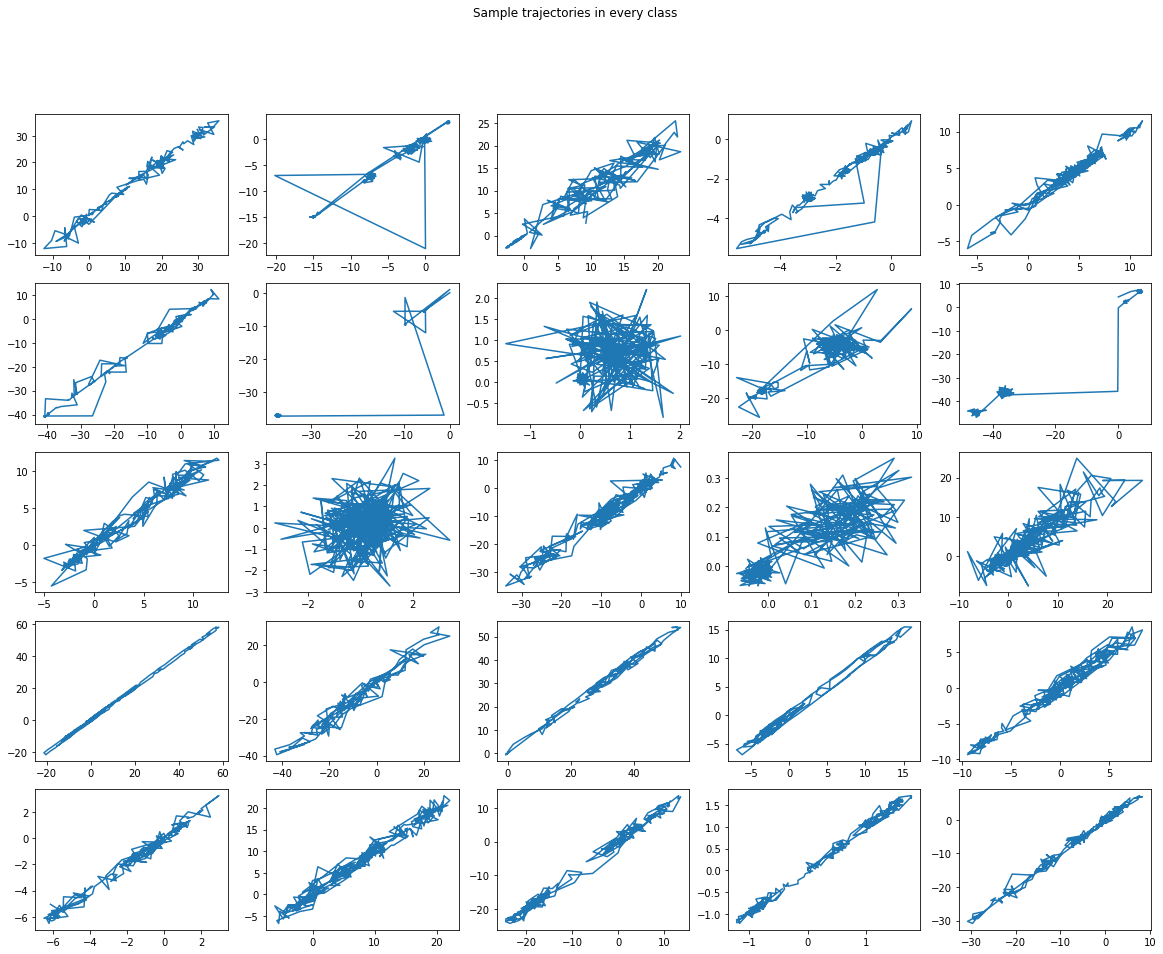

In [25]:
fig, axis = plt.subplots(5, 5, figsize=(20, 15))
fig.suptitle("Sample trajectories in every class")

for i, class_ in enumerate(samples_per_class):
    for j, sample in enumerate(class_):
        axis[i, j].plot(sample[:, 0], sample[:, 1])

plt.show()

AttributeError: 'PathCollection' object has no attribute 'plot'